In [28]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


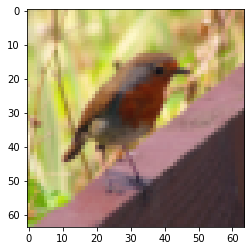

In [30]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [31]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [32]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# Funtions

In [60]:
def compute_cost(AL, Y):
  
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters  

def initialize_parameters_deep(layer_dims):
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

## Two layer model

In [7]:
## we know the weights are determin by (n,n-1)

In [8]:
n0=train_x_flatten.shape[0]
n1= 7 # number of active node in hidden layer 1
n_y = train_y.shape[0]
print("layers_dims = ",n0,',' ,n1,',' ,n_y)
parameters = initialize_parameters(n0, n1, n_y)

layers_dims =  12288 , 7 , 1


In [9]:
# MetaParameters
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]
Y = train_y
X = train_x
m = train_x.shape[1]
# Hyperparameters
learning_rate = 0.0075
epochs=4000
iter_count=[]
costs=[]
for epoch in range(epochs):
    Z1 = W1.dot(X)+b1
    A1 = np.maximum(0,Z1)
    Z2 = W2.dot(A1) + b2
    A2 = 1/(1+np.exp(-Z2))

   # dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))  #dJ/dA2
    dZ2 = A2 - Y #dA2 * Z2 * (1-Z2)                    
    dW2 = (1/m)*dZ2.dot(A1.T)                           
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)

    dA1 = W2.T.dot(dZ2)
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0
   
    
    dW1 = (1/m)*dZ1.dot(X.T)                           
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True) 

     # Gradient descent

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    if epochs % 100 == 0:
        costs.append(compute_cost(A2,Y))
        iter_count.append(epoch)

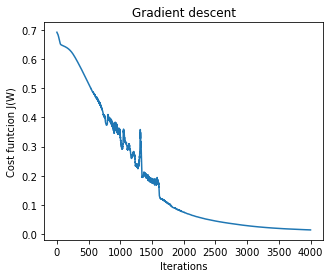

In [10]:
plt.plot(iter_count,costs)
plt.title("Gradient descent")
plt.xlabel("Iterations")
plt.ylabel("Cost funtcion J(W)")
plt.show()

In [11]:
#### Prediction on Train Data
predictions = (A2 > 0.5).astype(int)
Accuracy=(predictions==Y).sum()/m*100
print("Accuracy on Train data: ",Accuracy,"%")

#### Prediction on Test Data
Y = test_y
X = test_x
m = test_x.shape[1]
Z1 = W1.dot(X)+b1
A1 = np.maximum(0,Z1)
Z2 = W2.dot(A1) + b2
A2 = 1/(1+np.exp(-Z2))
predictions = (A2 > 0.5).astype(int)
Accuracy=(predictions==Y).sum()/m*100
print("Accuracy on Test Data",Accuracy,"%")

Accuracy on Train data:  100.0 %
Accuracy on Test Data 70.0 %


# Deeper networks

# 3 Layer Neuron

In [272]:
n0=train_x_flatten.shape[0]
n1=  20 # number of active node in hidden layer 1
n2 = 7
n3 = 5
n_y = train_y.shape[0]
print("                                  DIMENSIONS:")
print("Neural Architecture: = ",n0,'-->' ,n1,'-->' ,n2,'-->',n3,'-->',n_y)

  ###  DATA SET ###
Y = train_y
X = train_x
m = train_x.shape[1]
iter_count=[]
costs=[]

   ### METAPARAMETERS ###
W1 = np.random.randn(n1, n0)*0.01
b1 = np.zeros((n1, 1))
W2 = np.random.randn(n2, n1)*0.01
b2 = np.zeros((n2, 1))
W3 = np.random.randn(n3, n2)*0.01
b3 = np.zeros((n3, 1))
W4 = np.random.randn(n_y, n3)*0.01
b4 = np.zeros((n_y, 1))

                                  DIMENSIONS:
Neural Architecture: =  12288 --> 20 --> 7 --> 5 --> 1


In [273]:
layers_dims = [12288, 20, 7, 5, 1]

np.random.seed(1)
parameters = initialize_parameters_deep(layers_dims)
learning_rate =  0.009
# MetaParameters
W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]
W3 = parameters["W3"]
b3 = parameters["b3"]
W4 = parameters["W4"]
b4 = parameters["b4"]

In [279]:
for epoch in range(0, 2500):
    ### FeedForward
    Z1 = W1.dot(X)+b1
    A1 = np.maximum(0,Z1)

    Z2 = W2.dot(A1)+b2
    A2 = np.maximum(0,Z2)

    Z3 = W3.dot(A2)+b3
    A3 = np.maximum(0,Z3)

    Z4 = W4.dot(A3)+b4
    A4 = 1/(1+np.exp(-Z4))

    if epoch % 100 == 0:
        costs.append(compute_cost(A4,Y))
        iter_count.append(epoch)

    ### Back prop
    dZ4 = A4-Y
    dW4 = (1/m)*dZ4.dot(A3.T) 
    db4 = (1/m)*np.sum(dZ4,axis=1,keepdims=True)

    dA3 = W4.T.dot(dZ4)
    dZ3 = np.array(dA3, copy=True)
    dZ3[Z3 <= 0] = 0
    dW3 = (1/m)*dZ3.dot(A2.T) 
    db3 = (1/m)*np.sum(dZ3,axis=1,keepdims=True)

    dA2 = W3.T.dot(dZ3)
    dZ2 = np.array(dA2, copy=True)
    dZ2[Z2 <= 0] = 0
    dW2 = (1/m)*dZ2.dot(A1.T) 
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)


    dA1 = W2.T.dot(dZ2)
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0
    dW1 = (1/m)*dZ1.dot(X.T) 
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)

    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    W3=W3-learning_rate*dW3
    W4=W4-learning_rate*dW4
    b1=b1-learning_rate*b1
    b2=b2-learning_rate*b2
    b3=b3-learning_rate*b3
    b4=b4-learning_rate*b4


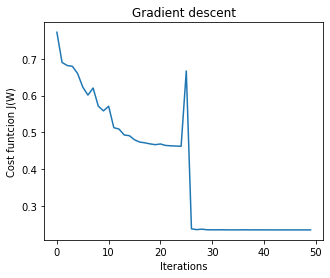

In [280]:
plt.plot(costs,"-")
plt.title("Gradient descent")
plt.xlabel("Iterations")
plt.ylabel("Cost funtcion J(W)")
plt.show()

In [281]:
costs

[array(0.77174933),
 array(0.6898239),
 array(0.68147256),
 array(0.67932001),
 array(0.65998081),
 array(0.6231723),
 array(0.60131779),
 array(0.62049744),
 array(0.57148508),
 array(0.55857994),
 array(0.57112263),
 array(0.51297574),
 array(0.50921145),
 array(0.49320294),
 array(0.49126521),
 array(0.48013665),
 array(0.47396188),
 array(0.47191745),
 array(0.46901472),
 array(0.46689487),
 array(0.46878075),
 array(0.4648279),
 array(0.46380974),
 array(0.46314864),
 array(0.46255908),
 array(0.66675242),
 array(0.23865342),
 array(0.23653914),
 array(0.23776514),
 array(0.23617223),
 array(0.2359845),
 array(0.23597329),
 array(0.23613396),
 array(0.23589963),
 array(0.23583949),
 array(0.23584529),
 array(0.23605438),
 array(0.23581514),
 array(0.23595366),
 array(0.23587876),
 array(0.23584351),
 array(0.23584185),
 array(0.23580455),
 array(0.23578842),
 array(0.23575509),
 array(0.23575992),
 array(0.23576768),
 array(0.23576725),
 array(0.23580085),
 array(0.23577829)]

In [282]:
#### Prediction on Train Data
predictions = (A4 > 0.5).astype(int)
Accuracy=(predictions==Y).sum()/m*100
print("Accuracy on Train data: ",Accuracy,"%")

#### Prediction on Test Data
Y = test_y
X = test_x
m = test_x.shape[1]
### FeedForward
Z1 = W1.dot(X)+b1
A1 = np.maximum(0,Z1)

Z2 = W2.dot(A1)+b2
A2 = np.maximum(0,Z2)

Z3 = W3.dot(A2)+b3
A3 = np.maximum(0,Z3)

Z4 = W4.dot(A3)+b4
A4 = 1/(1+np.exp(-Z4))

predictions = (A4 > 0.5).astype(int)
Accuracy=(predictions==Y).sum()/m*100
print("Accuracy on Test Data",Accuracy,"%")

Accuracy on Train data:  100.0 %
Accuracy on Test Data 98.0 %


y = 1. It's a cat picture.
Prediction: 1


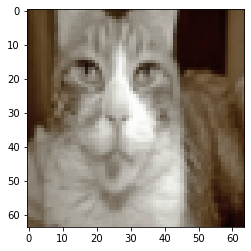

In [339]:
# Example of a picture
index = 31
plt.imshow(test_x_orig[index])
print ("y = " + str(test_y[0,index]) + ". It's a " + classes[test_y[0,index]].decode("utf-8") +  " picture.")
print("Prediction:", predictions[0][index])

In [314]:
predictions

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]])

In [316]:
test_y

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)